In [3]:
# 用来分析train_multi_GRU的结果，也就是滚动训练的结果的精确度

import pandas as pd
import numpy as np

import matplotlib.font_manager as fm
from matplotlib import rcParams

# 正确路径
myfont = fm.FontProperties(fname="/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc")
rcParams['font.sans-serif'] = [myfont.get_name()]
rcParams['axes.unicode_minus'] = False


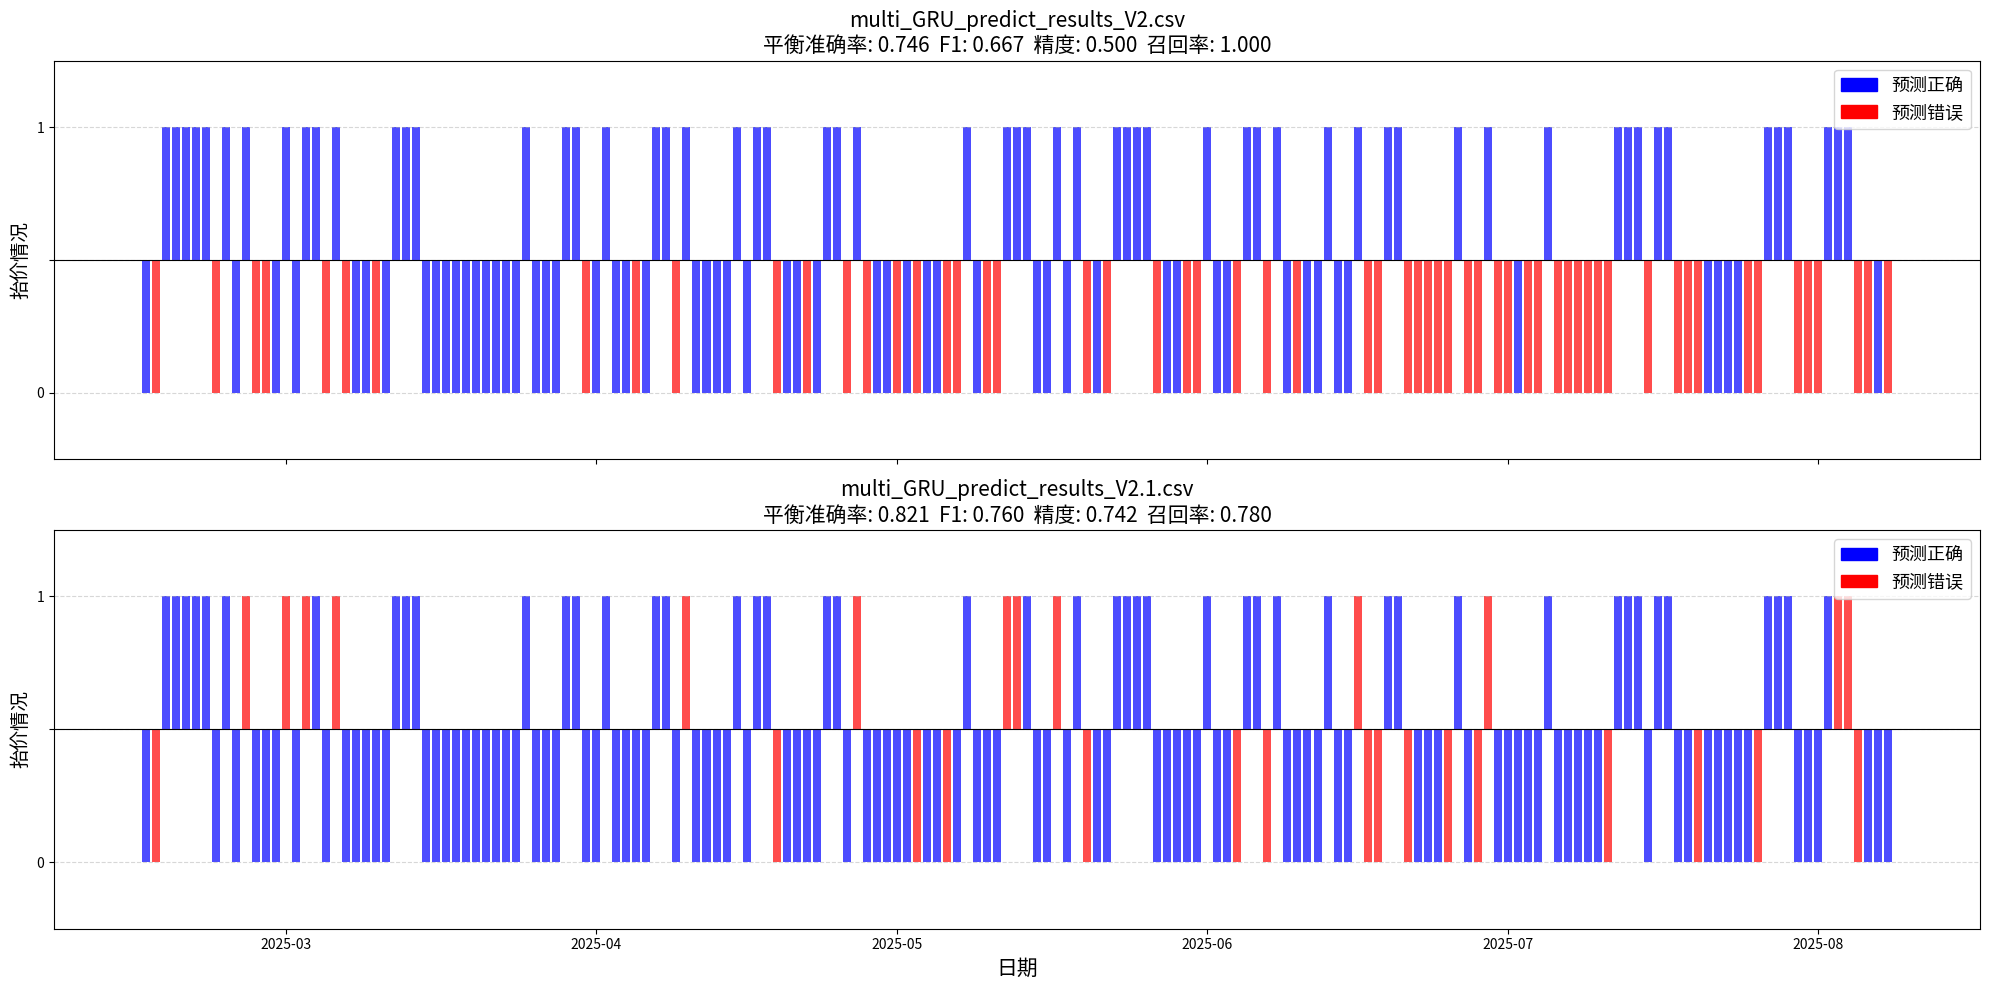

In [4]:
file_list = [
    # "multi_GRU_predict_results_V1.1.csv",
    # "multi_GRU_predict_results_V1.2.csv",
    # "multi_GRU_predict_results_V2.1.csv",
    "multi_GRU_predict_results_V2.csv",
    "multi_GRU_predict_results_V2.1.csv",
    # "multi_GRU_predict_results.csv",
    # "multi_GRU_predict_results_V1.3.csv",
    # "multi_GRU_predict_results_V1.4.csv",
    # "multi_GRU_predict_results_V1.5.csv",
]
root = "../save/curve_classify"

import matplotlib.patches as mpatches
from sklearn.metrics import balanced_accuracy_score, f1_score, precision_score, recall_score

# 增大子图尺寸
fig, axes = plt.subplots(len(file_list), 1, figsize=(20, 10), sharex=True)
for idx, file in enumerate(file_list):
    df = pd.read_csv(f"{root}/{file}")
    df["Date"] = pd.to_datetime(df["Date"])
    df = df.set_index("Date")
    df = df.sort_index()
    pred = df["Pred_Label"]
    true = df["True_Label"]

    # 计算指标
    bal_acc = balanced_accuracy_score(true, pred)
    f1 = f1_score(true, pred)
    precision = precision_score(true, pred)
    recall = recall_score(true, pred)

    # 0类用-1表示，1类用1表示
    bar_true = true.replace({0: -1, 1: 1})

    # 判断预测和真实是否一致
    correct = pred == true
    # 颜色：预测正确为蓝色，预测错误为红色
    colors = ['blue' if c else 'red' for c in correct]

    # 只画真实标签柱子，颜色根据预测是否正确
    axes[idx].bar(bar_true.index, bar_true.values, width=0.8, color=colors, alpha=0.7)

    axes[idx].axhline(0, color='black', linewidth=0.8)
    axes[idx].set_ylabel(f'抬价情况', fontsize=14)
    axes[idx].set_ylim(-1.5, 1.5)
    axes[idx].set_yticks([-1, 0, 1])
    axes[idx].set_yticklabels(['0', '', '1'])
    # 在标题中添加各项指标
    axes[idx].set_title(
        f"{file}\n平衡准确率: {bal_acc:.3f}  F1: {f1:.3f}  精度: {precision:.3f}  召回率: {recall:.3f}",
        fontsize=15
    )
    axes[idx].grid(axis='y', linestyle='--', alpha=0.5)
    # 修改图例，蓝色是预测正确，红色是预测错误
    correct_patch = mpatches.Patch(color='blue', label='预测正确')
    wrong_patch = mpatches.Patch(color='red', label='预测错误')
    axes[idx].legend(handles=[correct_patch, wrong_patch], loc='upper right', fontsize=13)

axes[-1].set_xlabel('日期', fontsize=15)
plt.tight_layout()
plt.show()